In [1]:
# import cv2
# import os
# import numpy as np

# def create_video_clips_from_folder(image_folder, output_folder, clip_length=30, fps=20):
#     categories = ['Active Subjects', 'Fatigue Subjects']
#     for category in categories:
#         category_folder = os.path.join(image_folder, category)
#         output_category_folder = os.path.join(output_folder, category)
#         if not os.path.exists(output_category_folder):
#             os.makedirs(output_category_folder)
        
#         image_files = [os.path.join(category_folder, img) for img in sorted(os.listdir(category_folder)) if img.endswith(".jpg")]
#         num_clips = len(image_files) // clip_length
        
#         for clip_number in range(num_clips):
#             clip_images = image_files[clip_number * clip_length:(clip_number + 1) * clip_length]
#             output_video_file = os.path.join(output_category_folder, f'clip_{clip_number}.mp4')
            
#             frame = cv2.imread(clip_images[0])
#             height, width, layers = frame.shape
#             video = cv2.VideoWriter(output_video_file, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
            
#             for image in clip_images:
#                 video.write(cv2.imread(image))
#             video.release()

# # Example usage:
# dataset_folder = '/home/vengatesan/VENKY/RAJA/BALAJI_PROJECT/FINAL/Dataset'  # Replace with the path to your dataset
# output_videos_folder = '/home/vengatesan/VENKY/RAJA/BALAJI_PROJECT/FINAL/LSTM_Dataset'  # Replace with the path where you want to save the videos
# create_video_clips_from_folder(dataset_folder, output_videos_folder)

In [2]:
# Importing importent Libraries

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, DenseNet121
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from keras.layers import BatchNormalization

2024-04-27 17:54:05.260636: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-27 17:54:05.319444: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-27 17:54:05.320582: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-27 17:54:06.230094: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
# Downloading Dataset and splitting into Train and Test Sets

In [5]:
path = "/home/vengatesan/VENKY/RAJA/BALAJI_PROJECT/FINAL/Dataset"

rootdir = "/home/vengatesan/VENKY/RAJA/BALAJI_PROJECT/FINAL"
classes_dir = ['Active Subjects', 'Fatigue Subjects'] #total labels
for i in classes_dir:
    if not os.path.exists(rootdir +'/train/' + i):
        os.makedirs(rootdir +'/train/' + i)
    if not os.path.exists(rootdir +'/test/' + i):
        os.makedirs(rootdir +'/test/' + i)

    source = path + '/' + i

    allFileNames = os.listdir(source)

    np.random.shuffle(allFileNames)

    test_ratio = 0.30

    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - test_ratio))])

    train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

    for name in train_FileNames:
        shutil.copy(name, rootdir +'/train/' + i)

    for name in test_FileNames:
        shutil.copy(name, rootdir +'/test/' + i)

In [6]:
# Downloading LSTM_CNN Dataset and splitting into Train and Test Sets

In [7]:
path = "/home/vengatesan/VENKY/RAJA/BALAJI_PROJECT/FINAL/LSTM_Dataset"

rootdir = "/home/vengatesan/VENKY/RAJA/BALAJI_PROJECT/FINAL"
classes_dir = ['Active Subjects', 'Fatigue Subjects'] #total labels
for i in classes_dir:
    if not os.path.exists(rootdir +'/lstm_train/' + i):
        os.makedirs(rootdir +'/lstm_train/' + i)
    if not os.path.exists(rootdir +'/lstm_test/' + i):
        os.makedirs(rootdir +'/lstm_test/' + i)

    source = path + '/' + i

    allFileNames = os.listdir(source)

    np.random.shuffle(allFileNames)

    test_ratio = 0.30

    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - test_ratio))])

    train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

    for name in train_FileNames:
        shutil.copy(name, rootdir +'/lstm_train/' + i)

    for name in test_FileNames:
        shutil.copy(name, rootdir +'/lstm_test/' + i)

In [8]:
# Setting dataset path for train and test sets 

In [9]:
train_path = rootdir + '/train'
test_path = rootdir + '/test'

In [10]:
# Setting dataset path for train and test sets 

In [11]:
lstm_train_path = rootdir + '/lstm_train'
lstm_test_path = rootdir + '/lstm_test'

In [12]:
# Data Visualization

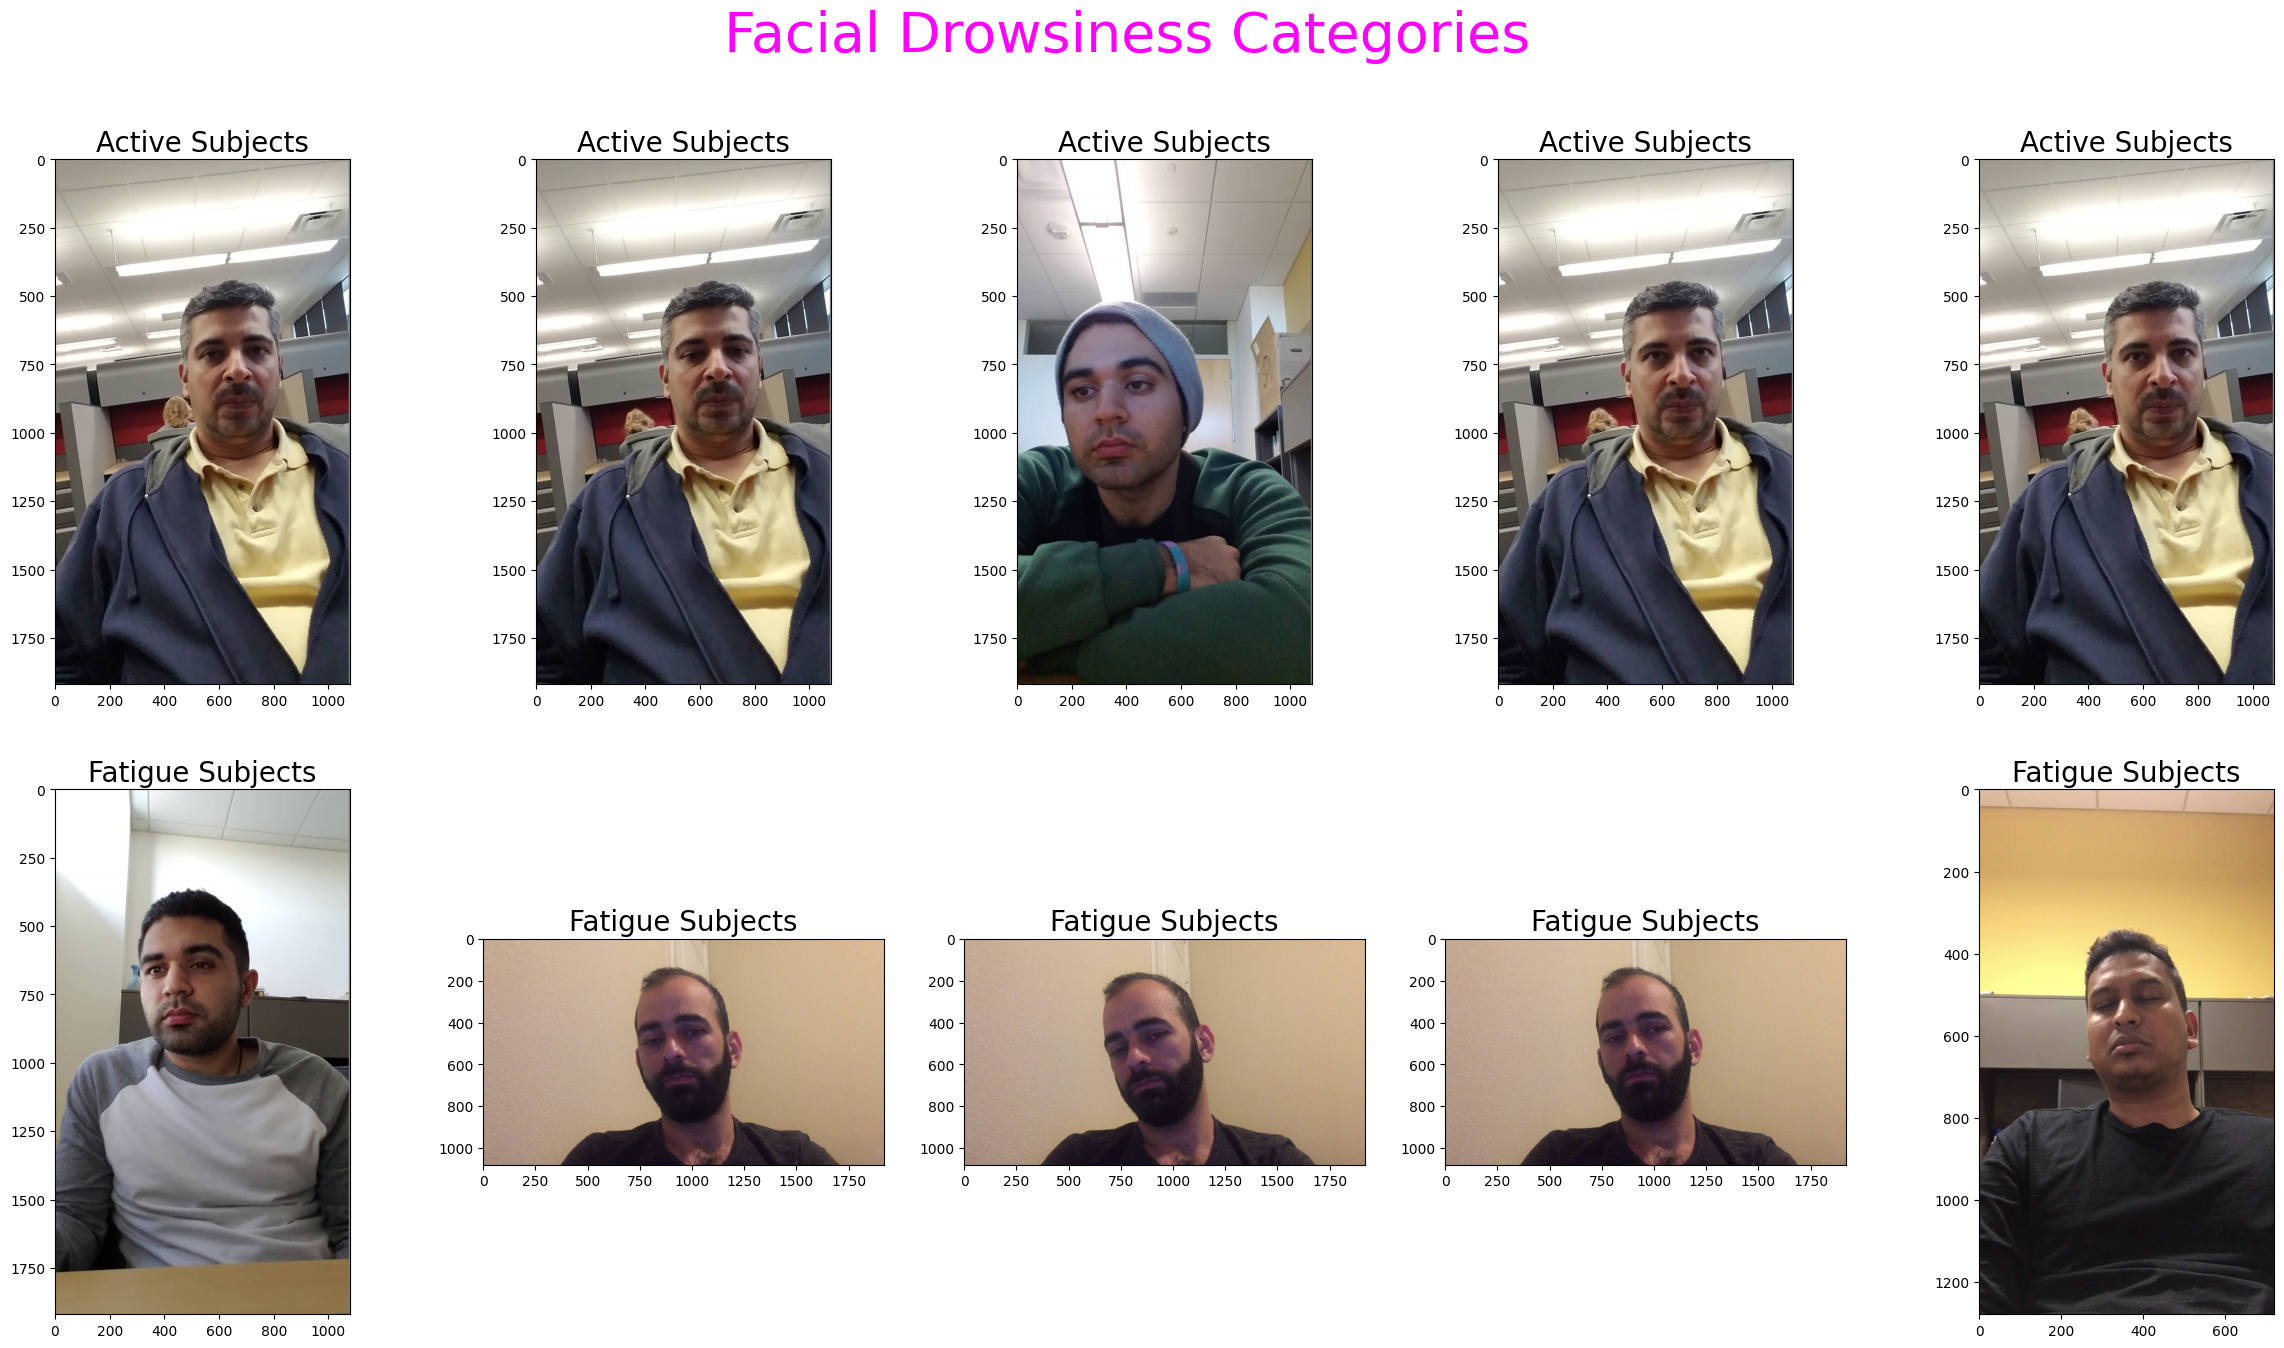

In [13]:
fig, ax = plt.subplots(2,5, figsize=(30,15))
fig.suptitle('Facial Drowsiness Categories',color='magenta',fontsize=40)
for i in range(2):
    for j in range(5):
        im_src = rootdir +'/Dataset/' + classes_dir[i] + '/'
        FileNames = os.listdir(im_src)
        np.random.shuffle(FileNames)
        im_src = str(im_src + FileNames[j])       
        imag = img.imread(im_src)
        ax[i, j].imshow(imag)
        ax[i, j].set_title(classes_dir[i], fontsize=20)

In [14]:
# Image pre-processing

In [15]:
def preprocess_image(image, target_size=(224, 224)):
    image = cv2.resize(image, target_size)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype('float32') / 255.0
    return image

In [16]:
# Data generators for data augmentation

In [17]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_image,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_image
)


In [18]:
# Load data generators

In [19]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 3880 images belonging to 2 classes.
Found 2182 images belonging to 2 classes.


In [20]:
import cv2
import os
import numpy as np

def preprocess_frame(frame):
    frame = cv2.resize(frame, (224, 224))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = frame.astype('float32') / 255.0
    return frame

def video_to_frames(video_file, num_frames=20):
    cap = cv2.VideoCapture(video_file)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        processed_frame = preprocess_frame(frame)
        frames.append(processed_frame)
        if len(frames) == num_frames:
            break
    cap.release()
    return np.array(frames)

def process_videos_from_folders(video_folders, num_frames=20):
    frame_sequences = []
    labels = []
    categories = {'Active Subjects': 0, 'Fatigue Subjects': 1}  # Assign labels to categories

    for category, label in categories.items():
        video_folder = os.path.join(video_folders, category)
        video_files = [os.path.join(video_folder, f) for f in os.listdir(video_folder) if f.endswith('.mp4')]

        for video_file in video_files:
            frames = video_to_frames(video_file, num_frames)
            if frames.shape[0] == num_frames:  # Ensure the video had enough frames
                frame_sequences.append(frames)
                labels.append(label)

    return np.array(frame_sequences), np.array(labels)

# Example usage:
video_folders = "/home/vengatesan/VENKY/RAJA/BALAJI_PROJECT/FINAL/LSTM_Dataset"  
frame_sequences, labels = process_videos_from_folders(video_folders)

In [21]:
def load_video_sequences(video_folders, num_frames=20):
    frame_sequences = []
    labels = []
    categories = {'Active Subjects': 0, 'Fatigue Subjects': 1}  # Assign labels to categories

    for category, label in categories.items():
        video_folder = os.path.join(video_folders, category)
        video_files = [os.path.join(video_folder, f) for f in os.listdir(video_folder) if f.endswith('.mp4')]

        for video_file in video_files:
            frames = video_to_frames(video_file, num_frames)
            if frames.shape[0] == num_frames:  # Ensure the video had enough frames
                frame_sequences.append(frames)
                labels.append(label)

    return np.array(frame_sequences), np.array(labels)

In [22]:
train_sequences, train_labels = load_video_sequences(lstm_train_path)
test_sequences, test_labels = load_video_sequences(lstm_test_path)

In [23]:
#Model 

In [24]:
# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [25]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define input and base model
inputs = Input(shape=(224, 224, 3))
base_model = VGG16(include_top=False, weights='imagenet', input_tensor=inputs)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Adding custom layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the model
vgg16 = Model(inputs, outputs)
vgg16.summary()

2024-04-27 17:54:35.061221: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [26]:
# Use the standard Adam optimizer
optimizer = Adam(learning_rate=0.001)

vgg16.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
vgg16_history = vgg16.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[reduce_lr, early_stop]
)

Epoch 1/50


2024-04-27 17:54:37.728587: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-04-27 17:54:37.858546: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


  1/122 [..............................] - ETA: 19:56 - loss: 0.7327 - accuracy: 0.4688

2024-04-27 17:54:46.375532: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-04-27 17:54:46.519758: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


  2/122 [..............................] - ETA: 14:27 - loss: 0.7370 - accuracy: 0.4219

2024-04-27 17:54:53.603841: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


122/122 [==============================] - 1108s 9s/step - loss: 0.4462 - accuracy: 0.7915 - val_loss: 0.2517 - val_accuracy: 0.9161 - lr: 0.0010
Epoch 2/50
122/122 [==============================] - 1064s 9s/step - loss: 0.2546 - accuracy: 0.8977 - val_loss: 0.2053 - val_accuracy: 0.9129 - lr: 0.0010
Epoch 3/50
122/122 [==============================] - 1065s 9s/step - loss: 0.2346 - accuracy: 0.9013 - val_loss: 0.2040 - val_accuracy: 0.9349 - lr: 0.0010
Epoch 4/50
122/122 [==============================] - 1064s 9s/step - loss: 0.2282 - accuracy: 0.9046 - val_loss: 0.2137 - val_accuracy: 0.9212 - lr: 0.0010
Epoch 5/50
122/122 [==============================] - 1079s 9s/step - loss: 0.2051 - accuracy: 0.9188 - val_loss: 0.1749 - val_accuracy: 0.9322 - lr: 0.0010
Epoch 6/50
122/122 [==============================] - 1192s 10s/step - loss: 0.2062 - accuracy: 0.9162 - val_loss: 0.1772 - val_accuracy: 0.9441 - lr: 0.0010
Epoch 7/50
122/122 [==============================] - 1139s 9s/step 

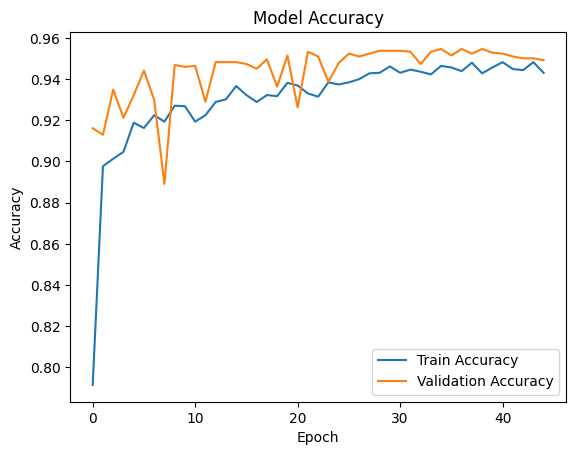

In [28]:
# Plot training history
import matplotlib.pyplot as plt

plt.plot(vgg16_history.history['accuracy'], label='Train Accuracy')
plt.plot(vgg16_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [29]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model, Sequential

# Define input and base model
inputs = Input(shape=(224, 224, 3))
base_model = DenseNet121(include_top=False, weights='imagenet', input_tensor=inputs)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Adding custom layers
x = Flatten()(base_model.output)
x = BatchNormalization()(x)
x = Dense(256, kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the model
DNet121 = Model(inputs, outputs)
DNet121.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_2[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

 rmalization)                                                                                     
                                                                                                  
 conv3_block1_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block1_concat (Conca  (None, 28, 28, 160)          0         ['pool2_pool[0][0]',          
 tenate)                                                             'conv3_block1_2_conv[0][0]'] 
          

 conv3_block5_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block5_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block5_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block5_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_concat (Conca  (None, 28, 28, 288)          0         ['conv3_block4_concat[0][0]', 
 tenate)  

                                                                                                  
 conv3_block9_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block9_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block9_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block9_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_blo

 pool3_pool (AveragePooling  (None, 14, 14, 256)          0         ['pool3_conv[0][0]']          
 2D)                                                                                              
                                                                                                  
 conv4_block1_0_bn (BatchNo  (None, 14, 14, 256)          1024      ['pool3_pool[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_0_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_1_conv (Conv2  (None, 14, 14, 128)          32768     ['conv4_block1_0_relu[0][0]'] 
 D)       

                                                                                                  
 conv4_block4_concat (Conca  (None, 14, 14, 384)          0         ['conv4_block3_concat[0][0]', 
 tenate)                                                             'conv4_block4_2_conv[0][0]'] 
                                                                                                  
 conv4_block5_0_bn (BatchNo  (None, 14, 14, 384)          1536      ['conv4_block4_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_0_relu (Activ  (None, 14, 14, 384)          0         ['conv4_block5_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block8_concat (Conca  (None, 14, 14, 512)          0         ['conv4_block7_concat[0][0]', 
 tenate)                                                             'conv4_block8_2_conv[0][0]'] 
                                                                                                  
 conv4_block9_0_bn (BatchNo  (None, 14, 14, 512)          2048      ['conv4_block8_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_0_relu (Activ  (None, 14, 14, 512)          0         ['conv4_block9_0_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block12_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_concat (Conc  (None, 14, 14, 640)          0         ['conv4_block11_concat[0][0]',
 atenate)                                                            'conv4_block12_2_conv[0][0]']
                                                                                                  
 conv4_block13_0_bn (BatchN  (None, 14, 14, 640)          2560      ['conv4_block12_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_0_relu (Acti  (None, 14, 14, 640)          0         ['conv4_block13_0_bn[0][0]']  
 vation)  

                                                                                                  
 conv4_block16_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block16_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_concat (Conc  (None, 14, 14, 768)          0         ['conv4_block15_concat[0][0]',
 atenate)                                                            'conv4_block16_2_conv[0][0]']
                                                                                                  
 conv4_block17_0_bn (BatchN  (None, 14, 14, 768)          3072      ['conv4_block16_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block20_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block20_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_concat (Conc  (None, 14, 14, 896)          0         ['conv4_block19_concat[0][0]',
 atenate)                                                            'conv4_block20_2_conv[0][0]']
                                                                                                  
 conv4_block21_0_bn (BatchN  (None, 14, 14, 896)          3584      ['conv4_block20_concat[0][0]']
 ormalization)                                                                                    
          

 conv4_block24_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block24_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block24_concat (Conc  (None, 14, 14, 1024)         0         ['conv4_block23_concat[0][0]',
 atenate)                                                            'conv4_block24_2_conv[0][0]']
                                                                                                  
 pool4_bn (BatchNormalizati  (None, 14, 14, 1024)         4096      ['conv4_block24_concat[0][0]']
 on)      

 rmalization)                                                                                     
                                                                                                  
 conv5_block4_0_relu (Activ  (None, 7, 7, 608)            0         ['conv5_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block4_1_conv (Conv2  (None, 7, 7, 128)            77824     ['conv5_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block4_1_bn (BatchNo  (None, 7, 7, 128)            512       ['conv5_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv5_block8_0_bn (BatchNo  (None, 7, 7, 736)            2944      ['conv5_block7_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, 7, 7, 736)            0         ['conv5_block8_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block8_1_conv (Conv2  (None, 7, 7, 128)            94208     ['conv5_block8_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block8_1_bn (BatchNo  (None, 7, 7, 128)            512       ['conv5_block8_1_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv5_block12_0_bn (BatchN  (None, 7, 7, 864)            3456      ['conv5_block11_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block12_0_relu (Acti  (None, 7, 7, 864)            0         ['conv5_block12_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block12_1_conv (Conv  (None, 7, 7, 128)            110592    ['conv5_block12_0_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_blo

 atenate)                                                            'conv5_block15_2_conv[0][0]']
                                                                                                  
 conv5_block16_0_bn (BatchN  (None, 7, 7, 992)            3968      ['conv5_block15_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block16_0_relu (Acti  (None, 7, 7, 992)            0         ['conv5_block16_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block16_1_conv (Conv  (None, 7, 7, 128)            126976    ['conv5_block16_0_relu[0][0]']
 2D)                                                                                              
          

In [30]:
# Compile models
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
DNet121.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
densenet_history = DNet121.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[reduce_lr, early_stop]
)

Epoch 1/50
122/122 [==============================] - 352s 3s/step - loss: 0.2353 - accuracy: 0.9067 - val_loss: 0.1534 - val_accuracy: 0.9523 - lr: 0.0010
Epoch 2/50
122/122 [==============================] - 337s 3s/step - loss: 0.1888 - accuracy: 0.9291 - val_loss: 0.1295 - val_accuracy: 0.9523 - lr: 0.0010
Epoch 3/50
122/122 [==============================] - 337s 3s/step - loss: 0.1621 - accuracy: 0.9343 - val_loss: 0.1237 - val_accuracy: 0.9592 - lr: 0.0010
Epoch 4/50
122/122 [==============================] - 337s 3s/step - loss: 0.1624 - accuracy: 0.9363 - val_loss: 0.1257 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 5/50
122/122 [==============================] - 335s 3s/step - loss: 0.1528 - accuracy: 0.9438 - val_loss: 0.1038 - val_accuracy: 0.9638 - lr: 0.0010
Epoch 6/50
122/122 [==============================] - 340s 3s/step - loss: 0.1496 - accuracy: 0.9469 - val_loss: 0.1056 - val_accuracy: 0.9606 - lr: 0.0010
Epoch 7/50
122/122 [==============================] - 333s 3s/st

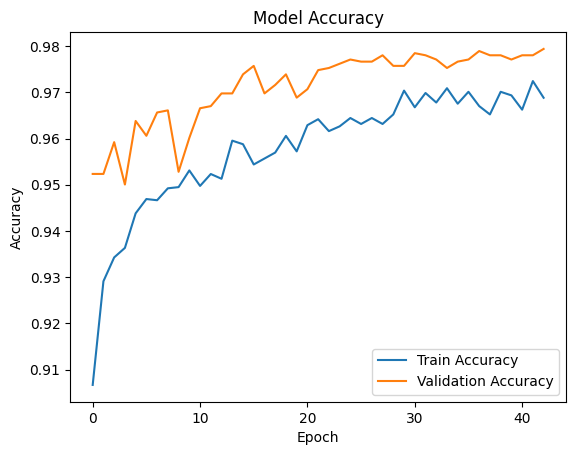

In [32]:
# Plot training history
import matplotlib.pyplot as plt

plt.plot(densenet_history.history['accuracy'], label='Train Accuracy')
plt.plot(densenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv2D, MaxPooling2D, LSTM, Dense, Flatten

lstm = Sequential()
lstm.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu', padding='same'), input_shape=(None, 224, 224, 3)))
lstm.add(TimeDistributed(MaxPooling2D((2, 2))))
lstm.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu', padding='same')))
lstm.add(TimeDistributed(MaxPooling2D((2, 2))))
lstm.add(TimeDistributed(Conv2D(128, (3, 3), activation='relu', padding='same')))
lstm.add(TimeDistributed(MaxPooling2D((2, 2))))
lstm.add(TimeDistributed(Flatten()))
lstm.add(LSTM(64))
lstm.add(Dense(128, activation='relu'))
lstm.add(Dense(1, activation='sigmoid'))

lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, None, 224, 224,    896       
 ributed)                    32)                                 
                                                                 
 time_distributed_1 (TimeDi  (None, None, 112, 112,    0         
 stributed)                  32)                                 
                                                                 
 time_distributed_2 (TimeDi  (None, None, 112, 112,    18496     
 stributed)                  64)                                 
                                                                 
 time_distributed_3 (TimeDi  (None, None, 56, 56, 64   0         
 stributed)                  )                                   
                                                                 
 time_distributed_4 (TimeDi  (None, None, 56, 56, 12   7

In [34]:
# Compile models
optimizer = Adam(learning_rate=0.001)
lstm.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
lstm_history = lstm.fit(
    train_sequences, train_labels,
    epochs=50,
    validation_data=(test_sequences, test_labels)
)

Epoch 1/50
2/2 [==============================] - 38s 13s/step - loss: 0.7853 - accuracy: 0.6905 - val_loss: 0.6029 - val_accuracy: 0.6923
Epoch 2/50
2/2 [==============================] - 35s 13s/step - loss: 0.5633 - accuracy: 0.6905 - val_loss: 0.6341 - val_accuracy: 0.7692
Epoch 3/50
2/2 [==============================] - 36s 12s/step - loss: 0.6174 - accuracy: 0.8333 - val_loss: 0.5318 - val_accuracy: 0.7308
Epoch 4/50
2/2 [==============================] - 34s 12s/step - loss: 0.5232 - accuracy: 0.7143 - val_loss: 0.4815 - val_accuracy: 0.7308
Epoch 5/50
2/2 [==============================] - 34s 12s/step - loss: 0.4543 - accuracy: 0.7857 - val_loss: 0.4220 - val_accuracy: 0.8077
Epoch 6/50
2/2 [==============================] - 34s 12s/step - loss: 0.4061 - accuracy: 0.8333 - val_loss: 0.4021 - val_accuracy: 0.7692
Epoch 7/50
2/2 [==============================] - 34s 12s/step - loss: 0.3996 - accuracy: 0.8095 - val_loss: 0.4133 - val_accuracy: 0.7308
Epoch 8/50
2/2 [===========

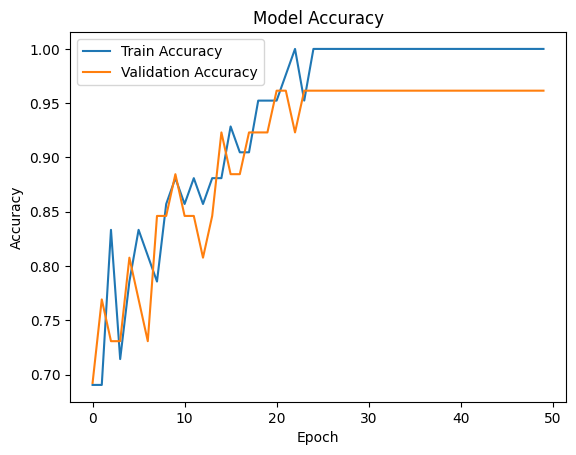

In [36]:
# Plot training history
import matplotlib.pyplot as plt

plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [37]:
# Model Performance Comparison 

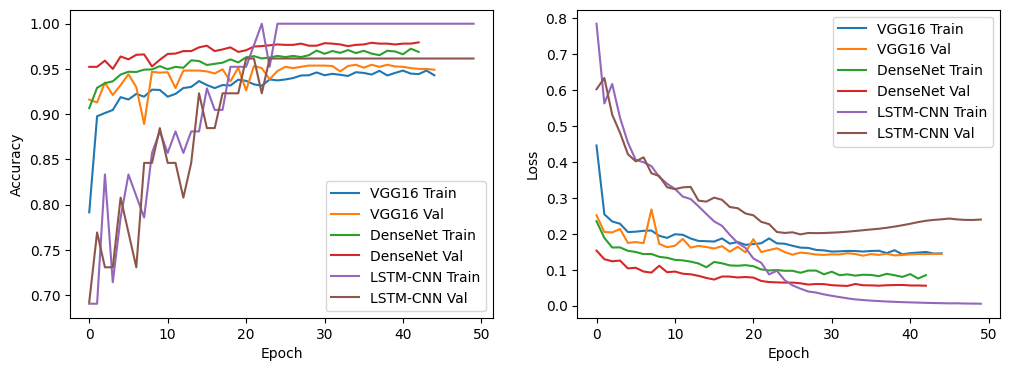

In [38]:
# Visualize training
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(vgg16_history.history['accuracy'], label='VGG16 Train')
plt.plot(vgg16_history.history['val_accuracy'], label='VGG16 Val')
plt.plot(densenet_history.history['accuracy'], label='DenseNet Train')
plt.plot(densenet_history.history['val_accuracy'], label='DenseNet Val')
plt.plot(lstm_history.history['accuracy'], label='LSTM-CNN Train')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM-CNN Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(vgg16_history.history['loss'], label='VGG16 Train')
plt.plot(vgg16_history.history['val_loss'], label='VGG16 Val')
plt.plot(densenet_history.history['loss'], label='DenseNet Train')
plt.plot(densenet_history.history['val_loss'], label='DenseNet Val')
plt.plot(lstm_history.history['loss'], label='LSTM-CNN Train')
plt.plot(lstm_history.history['val_loss'], label='LSTM-CNN Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 5s 5s/step
VGG16 Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52      1094
           1       0.50      0.47      0.48      1088

    accuracy                           0.50      2182
   macro avg       0.50      0.50      0.50      2182
weighted avg       0.50      0.50      0.50      2182

DenseNet Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.52      0.51      1094
           1       0.50      0.49      0.50      1088

    accuracy                           0.50      2182
   macro avg       0.50      0.50      0.50      2182
weighted avg       0.50      0.50      0.50      2182

LSTM-CNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.95      1.00      0.97        18

    accuracy                           

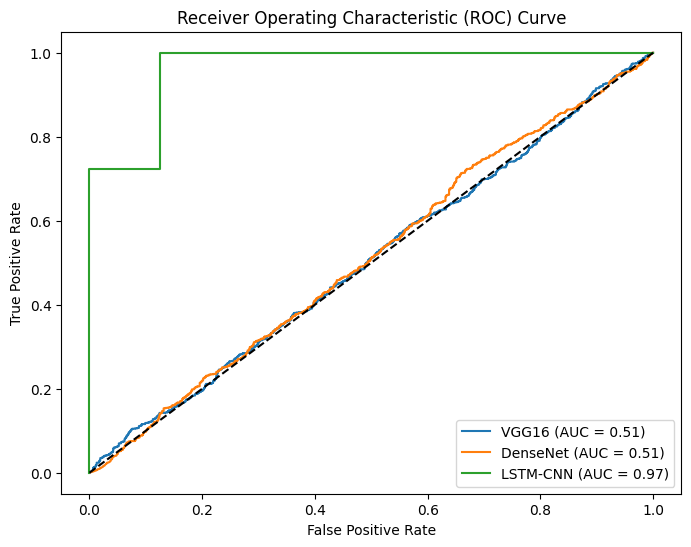

In [39]:
# Evaluate models on test data
vgg16_preds = vgg16.predict(test_generator)
densenet_preds = DNet121.predict(test_generator)
lstm_preds = lstm.predict(test_sequences)

# Confusion matrices
vgg16_cm = confusion_matrix(test_generator.classes, vgg16_preds.round())
densenet_cm = confusion_matrix(test_generator.classes, densenet_preds.round())
lstm_cm = confusion_matrix(test_labels, lstm_preds.round())

# Classification reports
print('VGG16 Classification Report:')
print(classification_report(test_generator.classes, vgg16_preds.round()))
print('DenseNet Classification Report:')
print(classification_report(test_generator.classes, densenet_preds.round()))
print('LSTM-CNN Classification Report:')
print(classification_report(test_labels, lstm_preds.round()))

# ROC curves
vgg16_fpr, vgg16_tpr, _ = roc_curve(test_generator.classes, vgg16_preds)
densenet_fpr, densenet_tpr, _ = roc_curve(test_generator.classes, densenet_preds)
lstm_fpr, lstm_tpr, _ = roc_curve(test_labels, lstm_preds)

vgg16_auc = auc(vgg16_fpr, vgg16_tpr)
densenet_auc = auc(densenet_fpr, densenet_tpr)
lstm_auc = auc(lstm_fpr, lstm_tpr)

plt.figure(figsize=(8, 6))
plt.plot(vgg16_fpr, vgg16_tpr, label=f'VGG16 (AUC = {vgg16_auc:.2f})')
plt.plot(densenet_fpr, densenet_tpr, label=f'DenseNet (AUC = {densenet_auc:.2f})')
plt.plot(lstm_fpr, lstm_tpr, label=f'LSTM-CNN (AUC = {lstm_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [40]:
#Hyperparameter Tuning and Learning Rate Scheduling

In [41]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define input and base model
inputs = Input(shape=(224, 224, 3))
base_model = VGG16(include_top=False, weights='imagenet', input_tensor=inputs)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = True

# Adding custom layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the model
vgg16 = Model(inputs, outputs)
vgg16.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [42]:
# Define input and base model
inputs = Input(shape=(224, 224, 3))
base_model = DenseNet121(include_top=False, weights='imagenet', input_tensor=inputs)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = True

# Adding custom layers
x = Flatten()(base_model.output)
x = BatchNormalization()(x)
x = Dense(256, kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the model
DNet121 = Model(inputs, outputs)
DNet121.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 230, 230, 3)          0         ['input_4[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

 rmalization)                                                                                     
                                                                                                  
 conv3_block1_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block1_concat (Conca  (None, 28, 28, 160)          0         ['pool2_pool[0][0]',          
 tenate)                                                             'conv3_block1_2_conv[0][0]'] 
          

 conv3_block5_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block5_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block5_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block5_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_concat (Conca  (None, 28, 28, 288)          0         ['conv3_block4_concat[0][0]', 
 tenate)  

                                                                                                  
 conv3_block9_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block9_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block9_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block9_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_blo

 pool3_pool (AveragePooling  (None, 14, 14, 256)          0         ['pool3_conv[0][0]']          
 2D)                                                                                              
                                                                                                  
 conv4_block1_0_bn (BatchNo  (None, 14, 14, 256)          1024      ['pool3_pool[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_0_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_1_conv (Conv2  (None, 14, 14, 128)          32768     ['conv4_block1_0_relu[0][0]'] 
 D)       

                                                                                                  
 conv4_block4_concat (Conca  (None, 14, 14, 384)          0         ['conv4_block3_concat[0][0]', 
 tenate)                                                             'conv4_block4_2_conv[0][0]'] 
                                                                                                  
 conv4_block5_0_bn (BatchNo  (None, 14, 14, 384)          1536      ['conv4_block4_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_0_relu (Activ  (None, 14, 14, 384)          0         ['conv4_block5_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block8_concat (Conca  (None, 14, 14, 512)          0         ['conv4_block7_concat[0][0]', 
 tenate)                                                             'conv4_block8_2_conv[0][0]'] 
                                                                                                  
 conv4_block9_0_bn (BatchNo  (None, 14, 14, 512)          2048      ['conv4_block8_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_0_relu (Activ  (None, 14, 14, 512)          0         ['conv4_block9_0_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block12_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_concat (Conc  (None, 14, 14, 640)          0         ['conv4_block11_concat[0][0]',
 atenate)                                                            'conv4_block12_2_conv[0][0]']
                                                                                                  
 conv4_block13_0_bn (BatchN  (None, 14, 14, 640)          2560      ['conv4_block12_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_0_relu (Acti  (None, 14, 14, 640)          0         ['conv4_block13_0_bn[0][0]']  
 vation)  

                                                                                                  
 conv4_block16_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block16_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_concat (Conc  (None, 14, 14, 768)          0         ['conv4_block15_concat[0][0]',
 atenate)                                                            'conv4_block16_2_conv[0][0]']
                                                                                                  
 conv4_block17_0_bn (BatchN  (None, 14, 14, 768)          3072      ['conv4_block16_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block20_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block20_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_concat (Conc  (None, 14, 14, 896)          0         ['conv4_block19_concat[0][0]',
 atenate)                                                            'conv4_block20_2_conv[0][0]']
                                                                                                  
 conv4_block21_0_bn (BatchN  (None, 14, 14, 896)          3584      ['conv4_block20_concat[0][0]']
 ormalization)                                                                                    
          

 conv4_block24_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block24_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block24_concat (Conc  (None, 14, 14, 1024)         0         ['conv4_block23_concat[0][0]',
 atenate)                                                            'conv4_block24_2_conv[0][0]']
                                                                                                  
 pool4_bn (BatchNormalizati  (None, 14, 14, 1024)         4096      ['conv4_block24_concat[0][0]']
 on)      

 rmalization)                                                                                     
                                                                                                  
 conv5_block4_0_relu (Activ  (None, 7, 7, 608)            0         ['conv5_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block4_1_conv (Conv2  (None, 7, 7, 128)            77824     ['conv5_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block4_1_bn (BatchNo  (None, 7, 7, 128)            512       ['conv5_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv5_block8_0_bn (BatchNo  (None, 7, 7, 736)            2944      ['conv5_block7_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, 7, 7, 736)            0         ['conv5_block8_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block8_1_conv (Conv2  (None, 7, 7, 128)            94208     ['conv5_block8_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block8_1_bn (BatchNo  (None, 7, 7, 128)            512       ['conv5_block8_1_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv5_block12_0_bn (BatchN  (None, 7, 7, 864)            3456      ['conv5_block11_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block12_0_relu (Acti  (None, 7, 7, 864)            0         ['conv5_block12_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block12_1_conv (Conv  (None, 7, 7, 128)            110592    ['conv5_block12_0_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_blo

 atenate)                                                            'conv5_block15_2_conv[0][0]']
                                                                                                  
 conv5_block16_0_bn (BatchN  (None, 7, 7, 992)            3968      ['conv5_block15_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block16_0_relu (Acti  (None, 7, 7, 992)            0         ['conv5_block16_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block16_1_conv (Conv  (None, 7, 7, 128)            126976    ['conv5_block16_0_relu[0][0]']
 2D)                                                                                              
          

In [43]:
# Compile models
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=1e-5)
vgg16.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
# Compile models
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=1e-5)
DNet121.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
# Compile models
optimizer = Adam(learning_rate=1e-5)
lstm.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
# Train models
vgg16_history = vgg16.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[reduce_lr, early_stop]
)

Epoch 1/30
122/122 [==============================] - 2548s 21s/step - loss: 0.3592 - accuracy: 0.8304 - val_loss: 0.2067 - val_accuracy: 0.8951 - lr: 1.0000e-05
Epoch 2/30
122/122 [==============================] - 2507s 21s/step - loss: 0.2203 - accuracy: 0.9077 - val_loss: 0.2119 - val_accuracy: 0.8960 - lr: 1.0000e-05
Epoch 3/30
122/122 [==============================] - 2685s 22s/step - loss: 0.1873 - accuracy: 0.9307 - val_loss: 0.1578 - val_accuracy: 0.9308 - lr: 1.0000e-05
Epoch 4/30
122/122 [==============================] - 2552s 21s/step - loss: 0.1567 - accuracy: 0.9443 - val_loss: 0.1358 - val_accuracy: 0.9588 - lr: 1.0000e-05
Epoch 5/30
122/122 [==============================] - 2554s 21s/step - loss: 0.1333 - accuracy: 0.9508 - val_loss: 0.0825 - val_accuracy: 0.9753 - lr: 1.0000e-05
Epoch 6/30
122/122 [==============================] - 2551s 21s/step - loss: 0.1010 - accuracy: 0.9639 - val_loss: 0.0680 - val_accuracy: 0.9748 - lr: 1.0000e-05
Epoch 7/30
122/122 [========

In [47]:
densenet_history = DNet121.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[reduce_lr, early_stop]
)

Epoch 1/30
122/122 [==============================] - 1072s 9s/step - loss: 0.3187 - accuracy: 0.8680 - val_loss: 0.1840 - val_accuracy: 0.9381 - lr: 1.0000e-05
Epoch 2/30
122/122 [==============================] - 1110s 9s/step - loss: 0.1848 - accuracy: 0.9330 - val_loss: 0.1249 - val_accuracy: 0.9546 - lr: 1.0000e-05
Epoch 3/30
122/122 [==============================] - 1067s 9s/step - loss: 0.1556 - accuracy: 0.9446 - val_loss: 0.1098 - val_accuracy: 0.9574 - lr: 1.0000e-05
Epoch 4/30
122/122 [==============================] - 1070s 9s/step - loss: 0.1301 - accuracy: 0.9554 - val_loss: 0.0936 - val_accuracy: 0.9711 - lr: 1.0000e-05
Epoch 5/30
122/122 [==============================] - 1073s 9s/step - loss: 0.1228 - accuracy: 0.9564 - val_loss: 0.0828 - val_accuracy: 0.9711 - lr: 1.0000e-05
Epoch 6/30
122/122 [==============================] - 1087s 9s/step - loss: 0.1027 - accuracy: 0.9626 - val_loss: 0.0681 - val_accuracy: 0.9748 - lr: 1.0000e-05
Epoch 7/30
122/122 [==============

In [49]:
lstm_history = lstm.fit(
    train_sequences, train_labels,
    steps_per_epoch=len(train_sequences),
    epochs=30,
    validation_data=(test_sequences, test_labels),
    validation_steps=len(test_sequences),
    callbacks=[reduce_lr, early_stop]
)

Epoch 1/30
42/42 [==============================] - 74s 2s/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.2464 - val_accuracy: 0.9615 - lr: 1.0000e-05
Epoch 2/30
42/42 [==============================] - 74s 2s/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.2496 - val_accuracy: 0.9615 - lr: 1.0000e-05
Epoch 3/30
42/42 [==============================] - 76s 2s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.2520 - val_accuracy: 0.9615 - lr: 1.0000e-05
Epoch 4/30
42/42 [==============================] - 78s 2s/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.2546 - val_accuracy: 0.9615 - lr: 1.0000e-05
Epoch 5/30
42/42 [==============================] - 76s 2s/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.2568 - val_accuracy: 0.9615 - lr: 1.0000e-05
Epoch 6/30
42/42 [==============================] - 74s 2s/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.2590 - val_accuracy: 0.9615 - lr: 1.0000e-05
Epoch 7/30
42/42 [==============================] - 70s 2s

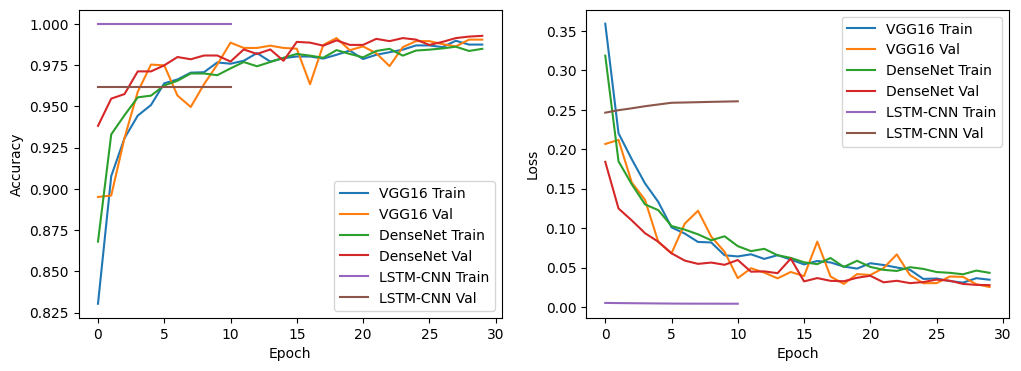

In [50]:
# Visualize training
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(vgg16_history.history['accuracy'], label='VGG16 Train')
plt.plot(vgg16_history.history['val_accuracy'], label='VGG16 Val')
plt.plot(densenet_history.history['accuracy'], label='DenseNet Train')
plt.plot(densenet_history.history['val_accuracy'], label='DenseNet Val')
plt.plot(lstm_history.history['accuracy'], label='LSTM-CNN Train')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM-CNN Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(vgg16_history.history['loss'], label='VGG16 Train')
plt.plot(vgg16_history.history['val_loss'], label='VGG16 Val')
plt.plot(densenet_history.history['loss'], label='DenseNet Train')
plt.plot(densenet_history.history['val_loss'], label='DenseNet Val')
plt.plot(lstm_history.history['loss'], label='LSTM-CNN Train')
plt.plot(lstm_history.history['val_loss'], label='LSTM-CNN Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 6s 6s/step
VGG16 Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1094
           1       0.50      0.50      0.50      1088

    accuracy                           0.51      2182
   macro avg       0.51      0.51      0.51      2182
weighted avg       0.51      0.51      0.51      2182

DenseNet Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      1094
           1       0.49      0.49      0.49      1088

    accuracy                           0.49      2182
   macro avg       0.49      0.49      0.49      2182
weighted avg       0.49      0.49      0.49      2182

LSTM-CNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.95      1.00      0.97        18

    accuracy                           

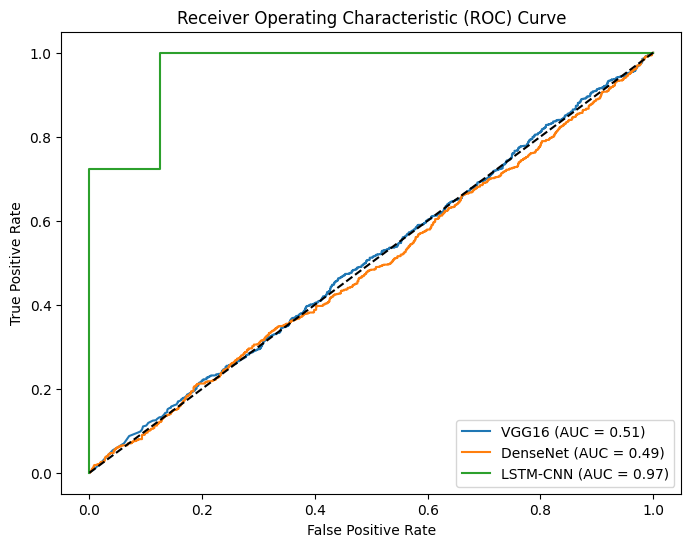

In [51]:
# Evaluate models on test data
vgg16_preds = vgg16.predict(test_generator)
densenet_preds = DNet121.predict(test_generator)
lstm_preds = lstm.predict(test_sequences)

# Confusion matrices
vgg16_cm = confusion_matrix(test_generator.classes, vgg16_preds.round())
densenet_cm = confusion_matrix(test_generator.classes, densenet_preds.round())
lstm_cm = confusion_matrix(test_labels, lstm_preds.round())

# Classification reports
print('VGG16 Classification Report:')
print(classification_report(test_generator.classes, vgg16_preds.round()))
print('DenseNet Classification Report:')
print(classification_report(test_generator.classes, densenet_preds.round()))
print('LSTM-CNN Classification Report:')
print(classification_report(test_labels, lstm_preds.round()))

# ROC curves
vgg16_fpr, vgg16_tpr, _ = roc_curve(test_generator.classes, vgg16_preds)
densenet_fpr, densenet_tpr, _ = roc_curve(test_generator.classes, densenet_preds)
lstm_fpr, lstm_tpr, _ = roc_curve(test_labels, lstm_preds)

vgg16_auc = auc(vgg16_fpr, vgg16_tpr)
densenet_auc = auc(densenet_fpr, densenet_tpr)
lstm_auc = auc(lstm_fpr, lstm_tpr)

plt.figure(figsize=(8, 6))
plt.plot(vgg16_fpr, vgg16_tpr, label=f'VGG16 (AUC = {vgg16_auc:.2f})')
plt.plot(densenet_fpr, densenet_tpr, label=f'DenseNet (AUC = {densenet_auc:.2f})')
plt.plot(lstm_fpr, lstm_tpr, label=f'LSTM-CNN (AUC = {lstm_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [53]:
import cv2
import numpy as np
from PIL import Image, ImageFilter
import os
from tqdm import tqdm

# Define the path to your test dataset
test_dataset_path = "/home/vengatesan/VENKY/RAJA/BALAJI_PROJECT/FINAL/test"
modified_dataset_path = "/home/vengatesan/VENKY/RAJA/BALAJI_PROJECT/FINAL/Modified_Dataset"

# Create the modified dataset directory if it doesn't exist
if not os.path.exists(modified_dataset_path):
    os.makedirs(modified_dataset_path)

# Define functions to apply real-world conditions
def apply_blur(image, intensity=5):
    return image.filter(ImageFilter.GaussianBlur(radius=intensity))

def apply_occlusion(image):
    width, height = image.size
    occlusion_size = (width // 4, height // 4)
    occlusion_position = (width // 2 - occlusion_size[0] // 2, height // 2 - occlusion_size[1] // 2)
    occlusion = Image.new("RGB", occlusion_size, "black")
    image.paste(occlusion, occlusion_position)
    return image

def apply_illumination_change(image, gamma=1.5):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(np.array(image), table)

# Process each image in each subdirectory of the dataset
subdirectories = ['Active Subjects', 'Fatigue Subjects']
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(test_dataset_path, subdirectory)
    modified_subdirectory_path = os.path.join(modified_dataset_path, subdirectory)
    
    # Create subdirectory in modified dataset directory if it doesn't exist
    if not os.path.exists(modified_subdirectory_path):
        os.makedirs(modified_subdirectory_path)
    
    for image_file in tqdm(os.listdir(subdirectory_path)):
        image_path = os.path.join(subdirectory_path, image_file)
        if os.path.isfile(image_path):
            # Open the image
            image = Image.open(image_path)

            # Apply blur
            blurred_image = apply_blur(image)

            # Apply occlusion
            occluded_image = apply_occlusion(image)

            # Apply illumination changes
            cv_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
            illumination_changed_image = apply_illumination_change(cv_image)
            illumination_changed_image = Image.fromarray(cv2.cvtColor(illumination_changed_image, cv2.COLOR_BGR2RGB))

            # Save the modified images
            blurred_image.save(os.path.join(modified_subdirectory_path, f'blurred_{image_file}'))
            occluded_image.save(os.path.join(modified_subdirectory_path, f'occluded_{image_file}'))
            illumination_changed_image.save(os.path.join(modified_subdirectory_path, f'illumination_changed_{image_file}'))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1088/1088 [01:22<00:00, 13.13it/s]


In [54]:
# Define the path where you want to save the LSTM model
lstm_cnn_save_path = "/home/vengatesan/VENKY/RAJA/BALAJI_PROJECT/FINAL/LSTM_CNN.h5"

# Assuming 'lstm_model' is your trained LSTM model instance
lstm.save(lstm_cnn_save_path)

print(f"LSTM model saved at {lstm_cnn_save_path}")

/home/vengatesan/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


LSTM model saved at /home/vengatesan/VENKY/RAJA/BALAJI_PROJECT/FINAL/LSTM_CNN.h5


In [55]:
# Define the path where you want to save the LSTM model
DenseNet_121_save_path = "/home/vengatesan/VENKY/RAJA/BALAJI_PROJECT/FINAL/DenseNet_121.h5"

# Assuming 'lstm_model' is your trained LSTM model instance
DNet121.save(DenseNet_121_save_path)

print(f"DenseNet-121 model saved at {DenseNet_121_save_path}")

DenseNet-121 model saved at /home/vengatesan/VENKY/RAJA/BALAJI_PROJECT/FINAL/DenseNet_121.h5


In [57]:
# Define the path where you want to save the LSTM model
VGG_16_save_path = "/home/vengatesan/VENKY/RAJA/BALAJI_PROJECT/FINAL/VGG_16.h5"

# Assuming 'lstm_model' is your trained LSTM model instance
vgg16.save(VGG_16_save_path)

print(f"VGG-16 model saved at {VGG_16_save_path}")

VGG-16 model saved at /home/vengatesan/VENKY/RAJA/BALAJI_PROJECT/FINAL/VGG_16.h5


10/10 [==============================] - 69s 7s/step - loss: 1.0539 - accuracy: 0.6062
LSTM Model Loss: 1.0539475679397583, Accuracy: 0.606249988079071
Found 6546 images belonging to 2 classes.
205/205 [==============================] - 1235s 6s/step - loss: 0.5675 - accuracy: 0.8037
VGG16 Model Accuracy: 0.80
205/205 [==============================] - 411s 2s/step - loss: 1.0187 - accuracy: 0.6274
DenseNet-121 Model Accuracy: 0.63


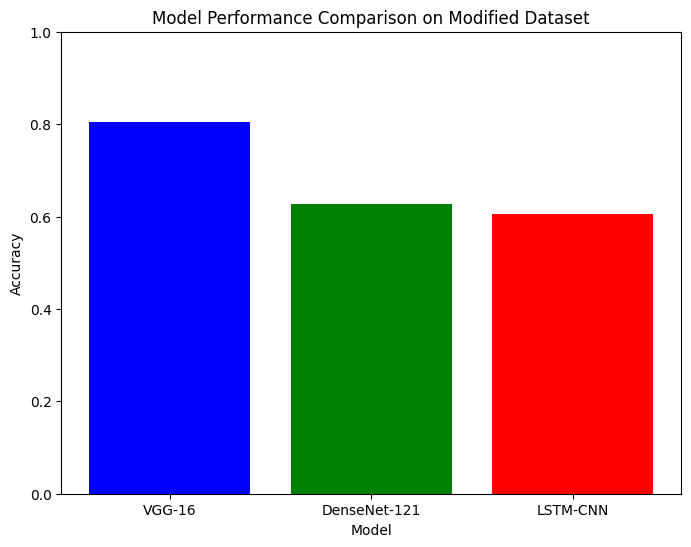

In [60]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

# Define paths
base_dir = "/home/vengatesan/VENKY/RAJA/BALAJI_PROJECT/FINAL/Modified_Dataset"
lstm_model_path = "/home/vengatesan/VENKY/RAJA/BALAJI_PROJECT/FINAL/LSTM_CNN.h5"
vgg16_model_path = "/home/vengatesan/VENKY/RAJA/BALAJI_PROJECT/FINAL/VGG_16.h5"
DenseNet_121_model_path = "/home/vengatesan/VENKY/RAJA/BALAJI_PROJECT/FINAL/DenseNet_121.h5"

# Load the models
lstm = load_model(lstm_model_path)
vgg16_model = load_model(vgg16_model_path)
DenseNet_121_model = load_model(DenseNet_121_model_path)

# Assuming that each sequence is stored in a subdirectory within base_dir
sequence_length = 20  # The number of frames in each sequence

# Define data augmentation
augmentation = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

def preprocess_frame(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = augmentation.random_transform(image_array)  # Apply random transformation
    return image_array

# Custom data generator for sequences with augmentation
def sequence_generator(directory, sequence_length, batch_size):
    sequences = []
    labels = []
    
    for subdir in sorted(os.listdir(directory)):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            all_frames = []
            for frame in sorted(os.listdir(subdir_path)):
                frame_path = os.path.join(subdir_path, frame)
                if frame.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check if the file is an image
                    image_array = preprocess_frame(frame_path)
                    all_frames.append(image_array)
            
            # Ensure there are enough frames for at least one sequence
            if len(all_frames) >= sequence_length:
                # Split the frames into sequences of the desired length
                for i in range(0, len(all_frames) - sequence_length + 1, sequence_length):
                    sequence = all_frames[i:i+sequence_length]
                    sequences.append(sequence)
                    labels.append(0 if subdir == 'Active Subjects' else 1)  # Assign labels based on subdirectory
    
    sequences = np.array(sequences)
    labels = np.array(labels)
    
    # Shuffle the sequences and labels
    indices = np.arange(len(sequences))
    np.random.shuffle(indices)
    sequences = sequences[indices]
    labels = labels[indices]
    
    # Generate batches of sequences
    num_batches = len(sequences) // batch_size
    for i in range(num_batches):
        batch_sequences = sequences[i*batch_size:(i+1)*batch_size]
        batch_labels = labels[i*batch_size:(i+1)*batch_size]
        yield batch_sequences, batch_labels

# Create a generator for the test set with augmentation
test_generator = sequence_generator(base_dir, sequence_length, batch_size=32)

# Calculate the number of steps based on the number of sequences and batch size
num_sequences = len(list(sequence_generator(base_dir, sequence_length, batch_size=1)))
steps = num_sequences // 32

# Evaluate the LSTM model on the test sequences with augmentation
lstm_results = lstm.evaluate(test_generator, steps=steps)
print(f"LSTM Model Loss: {lstm_results[0]}, Accuracy: {lstm_results[1]}")

# Prepare data generator for VGG16 and DenseNet-121
datagen = ImageDataGenerator(rescale=1./255)
test_generator_vgg_dense = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Evaluate the VGG16 model
vgg16_loss, vgg16_accuracy = vgg16_model.evaluate(test_generator_vgg_dense)
print(f"VGG16 Model Accuracy: {vgg16_accuracy:.2f}")

# Evaluate the DenseNet-121 model
densenet_loss, densenet_accuracy = DenseNet_121_model.evaluate(test_generator_vgg_dense)
print(f"DenseNet-121 Model Accuracy: {densenet_accuracy:.2f}")

# Plotting the combined results
models = ['VGG-16', 'DenseNet-121', 'LSTM-CNN']
accuracies = [vgg16_accuracy, densenet_accuracy, lstm_results[1]]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison on Modified Dataset')
plt.ylim([0, 1])
plt.show()